In [ ]:
#%% README

In [ ]:
import sys
print(sys.version_info)
print(sys.prefix)

In [ ]:
!python --version

In [ ]:
!python -m venv red
!red\Scripts\activate

In [ ]:
#%% install missing packages
!pip freeze > required_packages.txt
!pip install -r required_packages.txt

In [1]:
#%% read functions from .py files into notebook
import os
from glob import glob
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statistics as st
import ipywidgets as widgets
from ipywidgets import VBox
from functools import reduce
import UPGRADE_E_Data as ue

In [ ]:
#from ipyfilechooser import FileChooser

In [2]:
#%% set custom display options for Notebook
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 6)

In [3]:
#%% set directory of datasets, check to make sure user working directory is correct
path, allfiles = ue.set_path()

In [4]:
#%% select data to visualize
checked_boxes = ue.choose_data(path, allfiles)

In [5]:
# read in selected datasets and merge
datasets = ue.selected_datasets(checked_boxes)
df = ue.merge_datasets(datasets, path)
display(df)

Selected datasets to merge: 
 ['home_demographics.csv', 'home_mods.csv'] 



,PermNum,own_rent,reported_age,children,age18_64,age65plus,hh_size2,userlanguage,hometype,gender,race_americanindianoralaskannati,race_asian,race_blackorafricanamerican,race_middleeasternornorthafrican,race_nativehawaiianorotherpacifi,race_otherpleasespecify,race_prefernottosay,race_white,ethnicity_all,education,hhincome,mortgagerent,mortgagerentbins,homeyrs,yrbuilt,homesqft,heatsource,waterheatsource,energyexpenses,electricgasbill,mod_ligh,mod_kitc,mod_hvac,mod_wate,mod_yard,mod_mate,mod_elec,mod_smar,mod_rene,mod_none,mod_ligh_led,mod_ligh_dim,mod_kitc_ene,mod_kitc_est,mod_kitc_gst,mod_hvac_chp,mod_hvac_mhp,mod_hvac_erh,mod_hvac_sph,mod_hvac_gas,mod_hvac_oil,mod_hvac_cac,mod_hvac_pac,mod_hvac_wps,mod_hvac_soe,mod_hvac_seo,mod_hvac_sog,mod_hvac_fwg,mod_hvac_exh,mod_hvac_sve,mod_hvac_bve,mod_hvac_rad,mod_hvac_eca,mod_hvac_sma,mod_wate_boi,mod_wate_gas,mod_wate_ele,mod_wate_hpw,mod_wate_etw,mod_wate_gtw,mod_wate_soe,mod_wate_seo,mod_wate_sog,mod_wate_eca,mod_yard_aat,mod_yard_sun,mod_yard_law,mod_yard_wat,mod_mate_asb,mod_mate_dpw,mod_mate_tpw,mod_mate_wac,mod_mate_ins,mod_mate_sco,mod_mate_sid,mod_mate_roo,mod_elec_ktw,mod_elec_uep,mod_elec_gbg,mod_smar_ems,mod_smar_smt,mod_rene_wob,mod_rene_wib,mod_rene_sts,mod_rene_geo,mod_rene_bev,mod_rene_hbs,fac_comf,fac_usef,fac_appe,fac_brok,fac_bill,fac_main,fac_heal,fac_envi,fac_hoa,fac_othe
0,10000,Rent,36-45,0,2,0,2,EN,Single family detached home,Female,0,0,0,0,0,0,0,1,Not Hispanic or Latino,High school diploma or GED,"15,001-30,000",$1751-$2000,"$1,501-2,000",5-10 years,1930-1959,"2,001-2,500 square feet",Electricity,Electricity,$201-$250,Minimize expenses/energy use,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,10001,Own,18-25,0,3,0,3,EN,Single family detached home,Male,0,0,0,0,0,0,0,1,Not Hispanic or Latino,<NA>,"125,001-150,000",$6001-$7500,"$6,001-7,500",1-3 years,Don't know,"1,501-2,000 square feet",Don't know,Don't know,<NA>,"Yes, I often miss paying an electric and/or ga...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0
2,10002,Own,over 70,0,1,1,2,EN,Single family detached home,Male,0,0,0,0,0,0,0,1,Not Hispanic or Latino,Graduate or professional degree,"15,001-30,000",$701-$1000,"$701-1,500",5-10 years,1930-1959,"501-1,000 square feet",Natural gas,Natural gas,<NA>,No trouble,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9916,19997,Rent,56-65,0,1,0,1,EN,Condo or apartment with 4 or fewer units in bu...,Male,0,0,0,0,0,0,0,1,Not Hispanic or Latino,Associates degree or trade school,"60,001-75,000",$1501-$1750,"$1,501-2,000",10 years or longer,Don't know,Don't know,Natural gas,Natural gas,$101-$150,No trouble,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9917,19998,Rent,36-45,0,1,0,1,EN,Single family detached home,Male,0,0,0,0,0,0,0,1,Not Hispanic or Latino,High school diploma or GED,"15,001-30,000",$701-$900,"$701-1,500",3-5 years,1960-1979,"2,001-2,500 square feet",Propane,Electricity,$201-$250,No trouble,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
9918,19999,Own,36-45,0,3,2,5,EN,Single family detached home,Male,0,0,0,0,

In [6]:
column_categories_dict = ue.manually_reorder(ue.find_unique_categories(df))
column_categories_dict

{'own_rent': ['Own', 'Rent'],
 'reported_age': ['18-25',
  '26-35',
  '36-45',
  '46-55',
  '56-65',
  '65-70',
  'over 70'],
 'children': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'age18_64': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'age65plus': [0, 1, 2, 3, 4, 5],
 'hh_size2': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'userlanguage': ['EN', 'ES'],
 'hometype': ['Condo or apartment with 4 or fewer units in building',
  'Duplex, triplex, or townhouse',
  'Single family detached home'],
 'gender': ['Female',
  'Male',
  'Non-binary / third gender',
  'Prefer to self-identify'],
 'race_americanindianoralaskannati': [0, 1],
 'race_asian': [0, 1],
 'race_blackorafricanamerican': [0, 1],
 'race_middleeasternornorthafrican': [0, 1],
 'race_nativehawaiianorotherpacifi': [0, 1],
 'race_otherpleasespecify': [0, 1],
 'race_prefernottosay': [0, 1],
 'race_white': [0, 1],
 'ethnicity_all': ['Hispanic or Latino', 'Not Hispanic or Latino'],
 'education': ['Some high school, no diploma',
  'High school diploma or GED',
 

In [7]:
#%% assign each column to a data type list
binary_categories, numeric_categories, ordinal_categories, nominal_categories = ue.assign_data_type(column_categories_dict)

print("Binary: ", binary_categories)
print("Numeric: ", numeric_categories)
print("Ordinal: ", ordinal_categories)
print("Nominal: ", nominal_categories)

Binary:  ['race_americanindianoralaskannati', 'race_asian', 'race_blackorafricanamerican', 'race_middleeasternornorthafrican', 'race_nativehawaiianorotherpacifi', 'race_otherpleasespecify', 'race_prefernottosay', 'race_white', 'mod_ligh', 'mod_kitc', 'mod_hvac', 'mod_wate', 'mod_yard', 'mod_mate', 'mod_elec', 'mod_smar', 'mod_rene', 'mod_none', 'mod_ligh_led', 'mod_ligh_dim', 'mod_kitc_ene', 'mod_kitc_est', 'mod_kitc_gst', 'mod_hvac_chp', 'mod_hvac_mhp', 'mod_hvac_erh', 'mod_hvac_sph', 'mod_hvac_gas', 'mod_hvac_oil', 'mod_hvac_cac', 'mod_hvac_pac', 'mod_hvac_wps', 'mod_hvac_soe', 'mod_hvac_seo', 'mod_hvac_sog', 'mod_hvac_fwg', 'mod_hvac_exh', 'mod_hvac_sve', 'mod_hvac_bve', 'mod_hvac_rad', 'mod_hvac_eca', 'mod_hvac_sma', 'mod_wate_boi', 'mod_wate_gas', 'mod_wate_ele', 'mod_wate_hpw', 'mod_wate_etw', 'mod_wate_gtw', 'mod_wate_soe', 'mod_wate_seo', 'mod_wate_sog', 'mod_wate_eca', 'mod_yard_aat', 'mod_yard_sun', 'mod_yard_law', 'mod_yard_wat', 'mod_mate_asb', 'mod_mate_dpw', 'mod_mate_tpw

In [22]:
#%% group data by chosen column
group_by_column = "children"
groups = ue.split_data(df, group_by_column)
print(groups.keys())

KeyError: '0'

In [17]:
# count occurences of each category and group by chosen column
data_groups_dicts = ue.data_grouper(groups, column_categories_dict)
data_groups_dicts

{'Own': {'own_rent': {'Own': 7019, 'Rent': 0},
  'reported_age': {'18-25': 368,
   '26-35': 1162,
   '36-45': 1645,
   '46-55': 1069,
   '56-65': 1066,
   '65-70': 828,
   'over 70': 881},
  'children': {'0': 4240,
   '1': 1344,
   '2': 1041,
   '3': 287,
   '4': 78,
   '5': 22,
   '6': 5,
   '7': 2,
   '8': 0,
   '9': 0},
  'age18_64': {'0': 931,
   '1': 1494,
   '2': 3506,
   '3': 701,
   '4': 291,
   '5': 66,
   '6': 16,
   '7': 6,
   '8': 3,
   '9': 2,
   '10': 3},
  'age65plus': {'0': 4780, '1': 1372, '2': 842, '3': 20, '4': 3, '5': 2},
  'hh_size2': {'1': 956,
   '2': 2229,
   '3': 1770,
   '4': 1311,
   '5': 468,
   '6': 167,
   '7': 74,
   '8': 27,
   '9': 10,
   '10': 7},
  'userlanguage': {'EN': 6971, 'ES': 48},
  'hometype': {'Condo or apartment with 4 or fewer units in building': 240,
   'Duplex, triplex, or townhouse': 536,
   'Single family detached home': 6243},
  'gender': {'Female': 2952,
   'Male': 4009,
   'Non-binary / third gender': 18,
   'Prefer to self-identify'

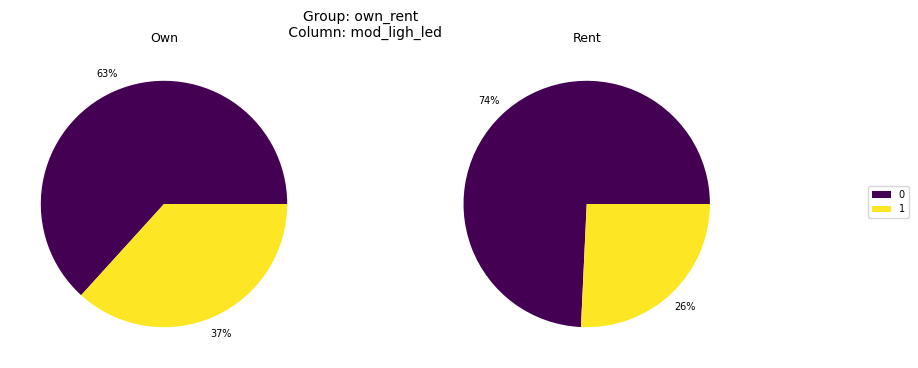

In [19]:
compare_column = "education"
ue.pie_plotter(data_groups_dicts, compare_column, group_by_column)

In [ ]:
#TODO
# drop down menu for selecting where to output graphs
# stacked column charts
# test for large NAs in certain datasets
# add to ordinal data list
# debug groupby numerical error
# change binary to yes / no

In [ ]:
df["upfront_cost"].sum(skipna=True)